In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import os
import tensorflow as tf
np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import pandas as pd
import os
from google.colab import drive

drive.mount('/content/drive')

In [5]:
base_dir = '/content/drive/MyDrive/DSO569 Project/CNN letter Dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:


# Mapping of labels
label_number = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
    'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18,
    'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27,
    'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34
}

# Prepare a list to collect data
data_list = []

# Loop through each directory (label) and file
for label, num in label_number.items():
    folder_path = os.path.join(base_dir, label)
    if os.path.exists(folder_path):
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            if os.path.isfile(file_path):
                # Append data as a dictionary to the list
                data_list.append({'path': file_path, 'label': num})

# Convert list to DataFrame
dataframed = pd.DataFrame(data_list)

# Display the DataFrame
print(dataframed.head())


                                                path  label
0  /content/drive/MyDrive/DSO569 Project/CNN lett...      0
1  /content/drive/MyDrive/DSO569 Project/CNN lett...      0
2  /content/drive/MyDrive/DSO569 Project/CNN lett...      0
3  /content/drive/MyDrive/DSO569 Project/CNN lett...      0
4  /content/drive/MyDrive/DSO569 Project/CNN lett...      0


In [12]:
dataframed

,path,label
0,/content/drive/MyDrive/DSO569 Project/CNN lett...,0
1,/content/drive/MyDrive/DSO569 Project/CNN lett...,0
2,/content/drive/MyDrive/DSO569 Project/CNN lett...,0
3,/content/drive/MyDrive/DSO569 Project/CNN lett...,0
4,/content/drive/MyDrive/DSO569 Project/CNN lett...,0
...,...,...
35495,/content/drive/MyDrive/DSO569 Project/CNN lett...,34
35496,/content/drive/MyDrive/DSO569 Project/CNN lett...,34
35497,/content/drive/MyDrive/DSO569 Project/CNN lett...,34
35498,/content/drive/MyDrive/DSO569 Project/CNN lett...,34


In [9]:
train, test = train_test_split(dataframed, test_size=0.2, random_state = 42)
train, valid = train_test_split(train, test_size= 0.2, random_state = 42)

In [10]:
import cv2
import numpy as np
import pandas as pd

def size_regulator(df, image_column='path', target_size=(100, 100)):
    i = 0
    images = []
    for path in df[image_column]:
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, target_size)
        i += 1
        print(i)
        images.append(image)

    return np.array(images)

In [11]:
X_Train = size_regulator(train)

Streaming output truncated to the last 5000 lines.
17721
17722
17723
17724
17725
17726
17727
17728
17729
17730
17731
17732
17733
17734
17735
17736
17737
17738
17739
17740
17741
17742
17743
17744
17745
17746
17747
17748
17749
17750
17751
17752
17753
17754
17755
17756
17757
17758
17759
17760
17761
17762
17763
17764
17765
17766
17767
17768
17769
17770
17771
17772
17773
17774
17775
17776
17777
17778
17779
17780
17781
17782
17783
17784
17785
17786
17787
17788
17789
17790
17791
17792
17793
17794
17795
17796
17797
17798
17799
17800
17801
17802
17803
17804
17805
17806
17807
17808
17809
17810
17811
17812
17813
17814
17815
17816
17817
17818
17819
17820
17821
17822
17823
17824
17825
17826
17827
17828
17829
17830
17831
17832
17833
17834
17835
17836
17837
17838
17839
17840
17841
17842
17843
17844
17845
17846
17847
17848
17849
17850
17851
17852
17853
17854
17855
17856
17857
17858
17859
17860
17861
17862
17863
17864
17865
17866
17867
17868
17869
17870
17871
17872
17873
17874
17875
17876
17877
17878
1

In [13]:
X_Test = size_regulator(test)
X_Valid = size_regulator(valid)

Streaming output truncated to the last 5000 lines.
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
9

In [ ]:
y_Train = train
y_Test = test
y_Valid = valid

In [ ]:
y_Train = y_Train.drop(['path'], axis=1)
y_Test = y_Test.drop(['path'], axis=1)
y_Valid = y_Valid.drop(['path'], axis=1)

In [ ]:
y_Train_encoded = to_categorical(y_Train)
y_Test_encoded = to_categorical(y_Test)
y_Valid_encoded = to_categorical(y_Valid)

In [ ]:
y_Train_encoded = np.asarray(y_Train_encoded).astype('float32').reshape((-1,35))
y_Test_encoded = np.asarray(y_Test_encoded).astype('float32').reshape((-1,35))
y_Valid_encoded = np.asarray(y_Valid_encoded).astype('float32').reshape((-1, 35))

In [ ]:
X_Train = X_Train.reshape(-1, 100, 100, 1)
y_Train = np.array(y_Train)


X_Test = X_Test.reshape(-1, 100, 100, 1)
y_Test_np = np.array(y_Test)

X_Valid = X_Valid.reshape(-1, 100, 100, 1)
y_Valid_np = np.array(y_Valid)

In [ ]:
print("images in Train Shape = ", X_Train.shape)
print("images in Test Shape = " , X_Test.shape)
print("images in Valid Shape = ", X_Valid.shape)

images in Train Shape =  (22720, 100, 100, 1)
images in Test Shape =  (7100, 100, 100, 1)
images in Valid Shape =  (5680, 100, 100, 1)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Generation_1 = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range = 30,
        zoom_range = 0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip = True,
        vertical_flip=False)


Generation_1.fit(X_Train)

In [ ]:
Plate_Letter_Digit_Classifier = Sequential()

Plate_Letter_Digit_Classifier.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (100,100,1)))
Plate_Letter_Digit_Classifier.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
Plate_Letter_Digit_Classifier.add(Dense(units = 128, activation = 'relu'))
Plate_Letter_Digit_Classifier.add(BatchNormalization())
Plate_Letter_Digit_Classifier.add(Dropout(0.2))
Plate_Letter_Digit_Classifier.add(Flatten())
Plate_Letter_Digit_Classifier.add(Dense(units = 35, activation = 'softmax'))

In [ ]:
Plate_Letter_Digit_Classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 50, 50, 32)        0         
 g2D)                                                            
                                                                 
 dense_3 (Dense)             (None, 50, 50, 128)       4224      
                                                                 
 batch_normalization (Batch  (None, 50, 50, 128)       512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 50, 50, 128)       0         
                                                                 
 flatten_2 (Flatten)         (None, 320000)           

In [ ]:
Plate_Letter_Digit_Classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
learning_rate_callback = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = Plate_Letter_Digit_Classifier.fit(Generation_1.flow(X_Train, y_Train_encoded, batch_size = 32), validation_data = Generation_1.flow(X_Valid, y_Valid_encoded), callbacks = [learning_rate_callback], epochs = 10)

Epoch 1/10
710/710 [==============================] - 608s 855ms/step - loss: 5.0663 - accuracy: 0.3722 - val_loss: 2.2074 - val_accuracy: 0.4141 - lr: 0.0010
Epoch 2/10
710/710 [==============================] - 603s 849ms/step - loss: 1.5709 - accuracy: 0.5359 - val_loss: 1.4455 - val_accuracy: 0.5863 - lr: 0.0010
Epoch 3/10
710/710 [==============================] - 592s 834ms/step - loss: 1.4877 - accuracy: 0.5643 - val_loss: 1.4153 - val_accuracy: 0.5783 - lr: 0.0010
Epoch 4/10
710/710 [==============================] - ETA: 0s - loss: 1.3340 - accuracy: 0.6070
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
710/710 [==============================] - 611s 860ms/step - loss: 1.3340 - accuracy: 0.6070 - val_loss: 1.4709 - val_accuracy: 0.5731 - lr: 0.0010
Epoch 5/10
710/710 [==============================] - 589s 829ms/step - loss: 1.1757 - accuracy: 0.6628 - val_loss: 1.1661 - val_accuracy: 0.6569 - lr: 3.0000e-04
Epoch 6/10
710/710 [====================

In [ ]:
print("Loss of the model is - " , Plate_Letter_Digit_Classifier.evaluate(X_Test,y_Test_encoded)[0])
print("Accuracy of the model is - " , Plate_Letter_Digit_Classifier.evaluate(X_Test,y_Test_encoded)[1]*100 , "%")


222/222 [==============================] - 37s 163ms/step - loss: 0.4223 - accuracy: 0.9007
Loss of the model is -  0.4222508668899536
222/222 [==============================] - 36s 164ms/step - loss: 0.4223 - accuracy: 0.9007
Accuracy of the model is -  90.07042050361633 %


In [ ]:
label_number = {'0' : 0, '1' : 1, '2' : 2, '3' : 3, '4' : 4, '5' : 5, '6' : 6, '7' : 7, '8' : 8, '9' : 9, 'A' : 10, 'B' : 11, 'C' : 12, 'D' : 13, 'E' : 14, 'F' : 15, 'G' : 16, 'H' : 17, 'I' : 18, 'J' : 19, 'K' : 20, 'L' : 21, 'M' : 22, 'N' : 23, 'P' : 24, 'Q' : 25, 'R' : 26, 'S' : 27, 'T' : 28, 'U' : 29, 'V' : 30, 'W' : 31, 'X' : 32, 'Y' : 33, 'Z' : 34}
label_word = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

222/222 [==============================] - 43s 192ms/step


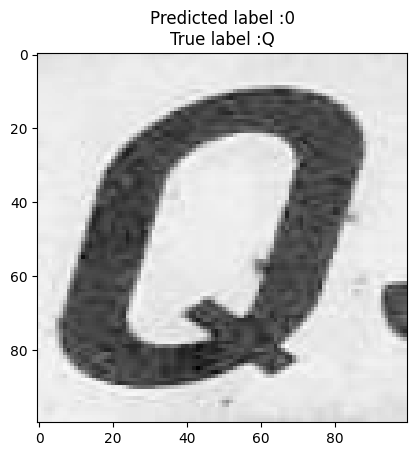

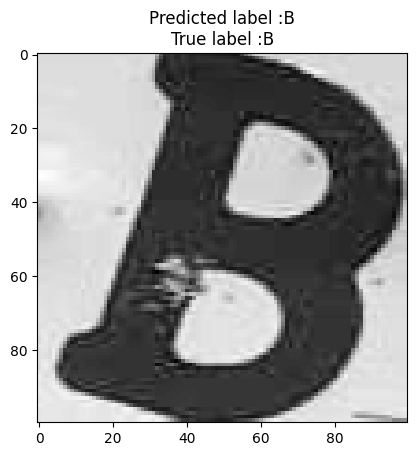

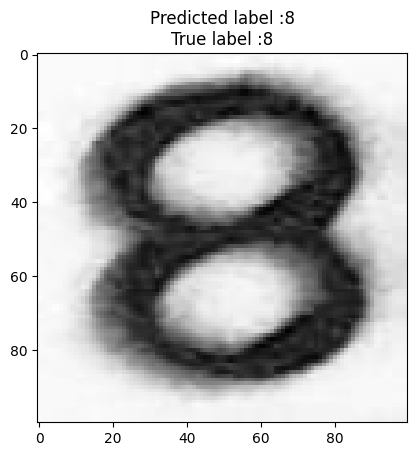

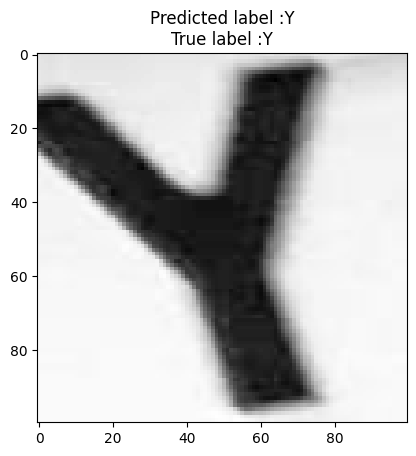

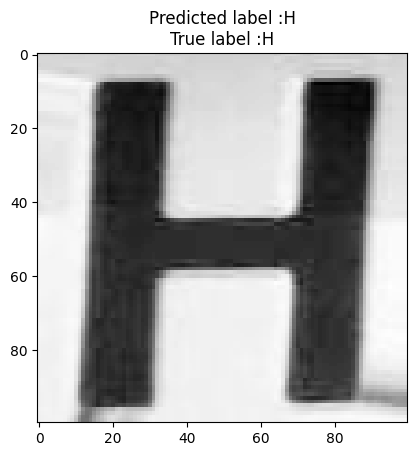

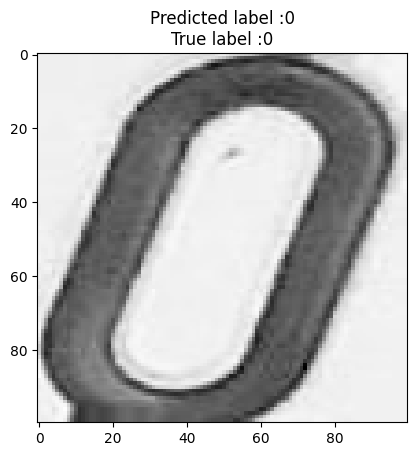

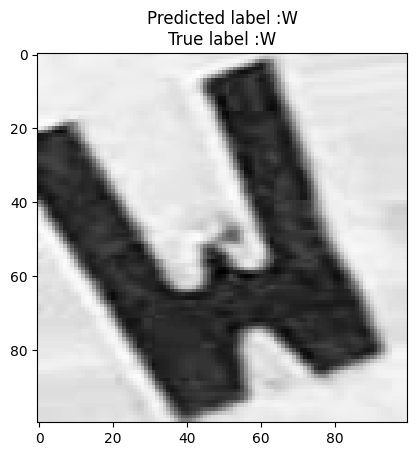

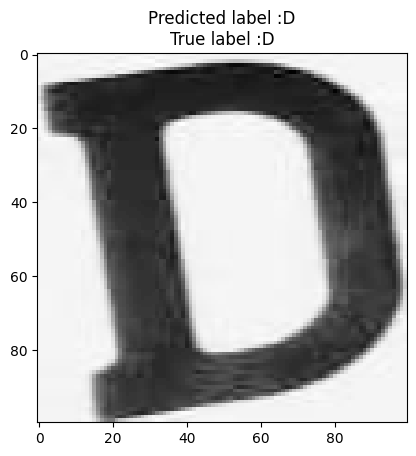

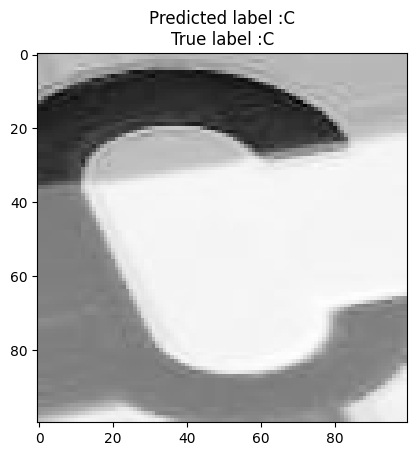

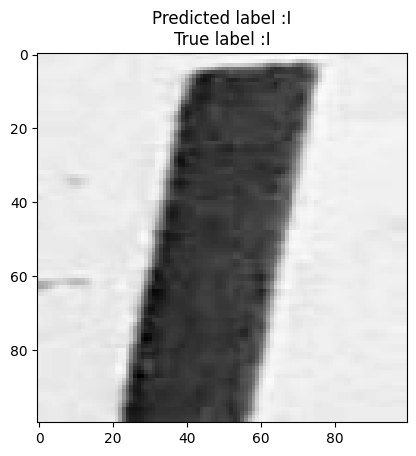

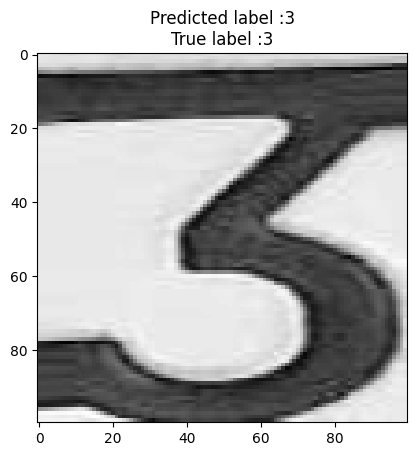

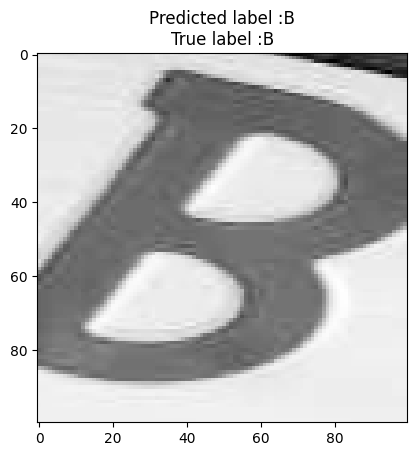

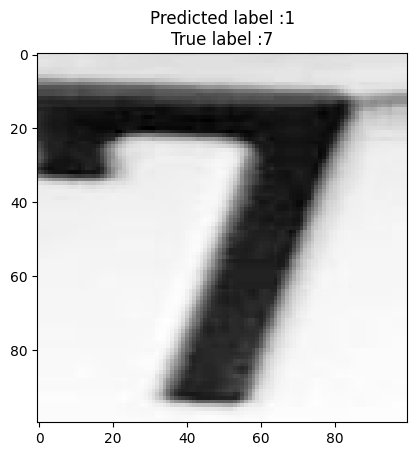

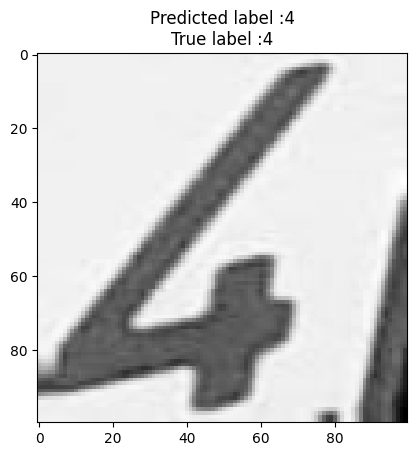

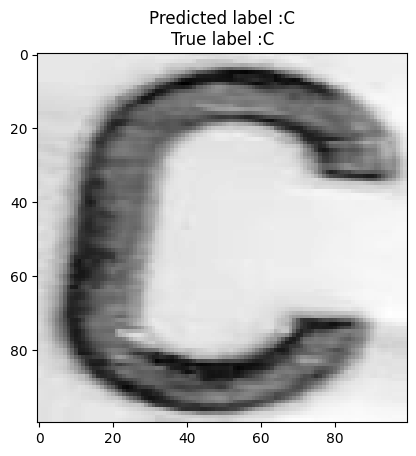

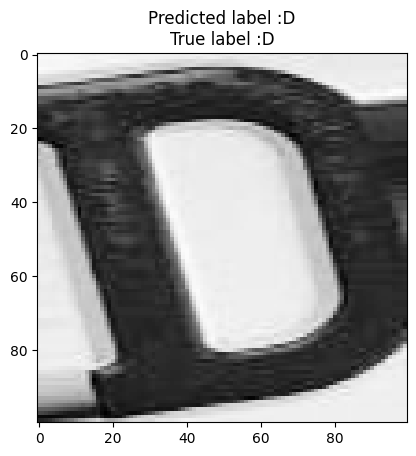

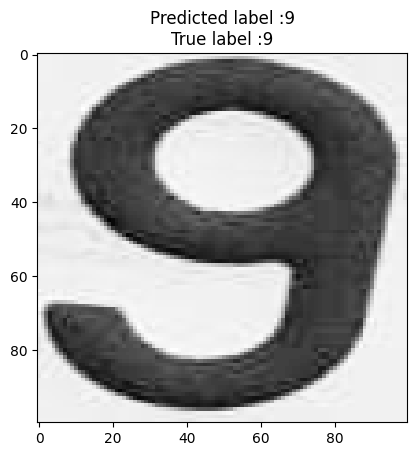

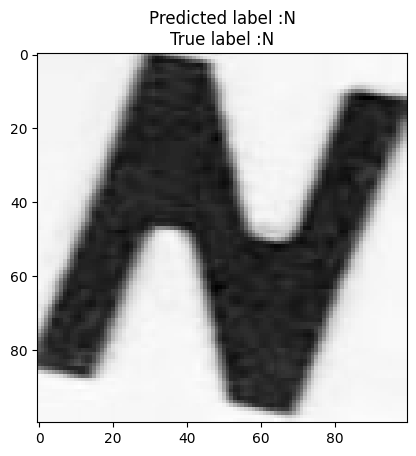

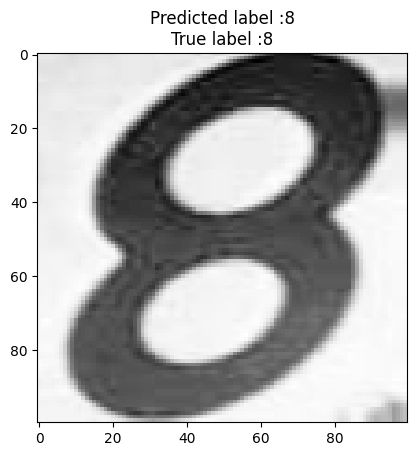

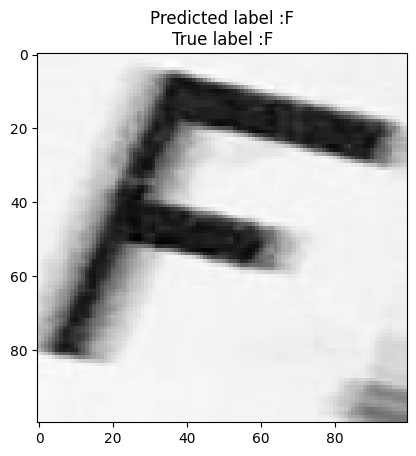

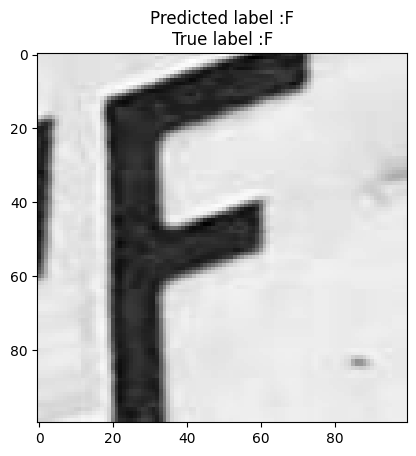

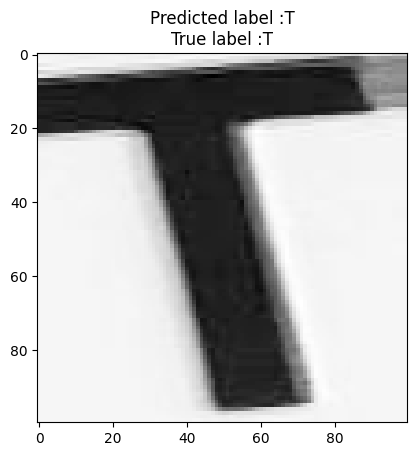

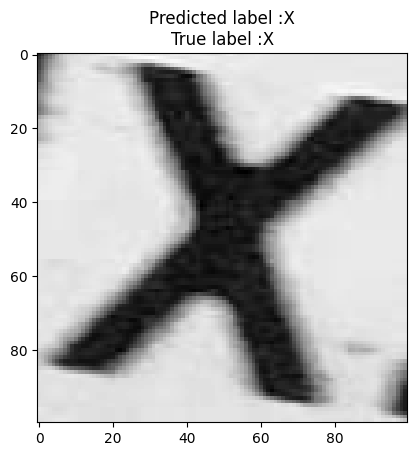

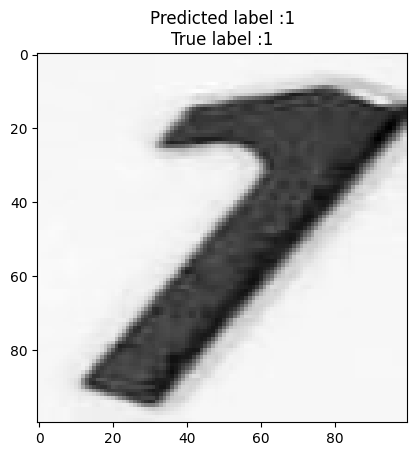

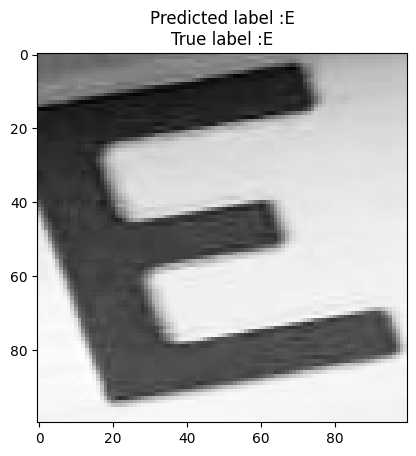

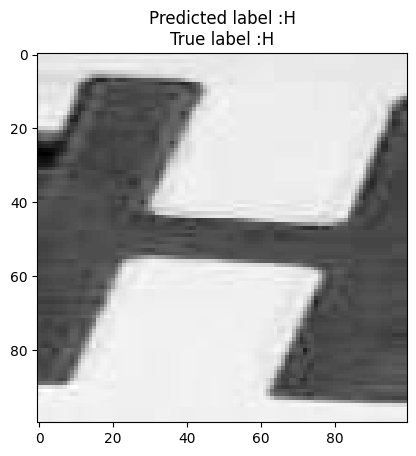

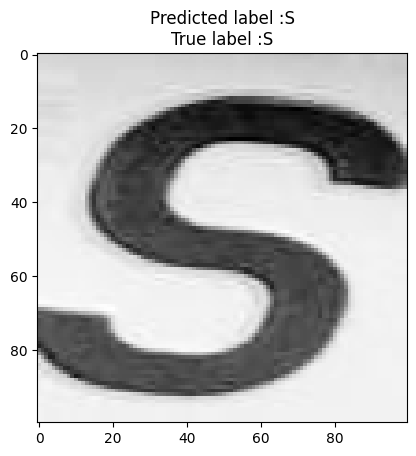

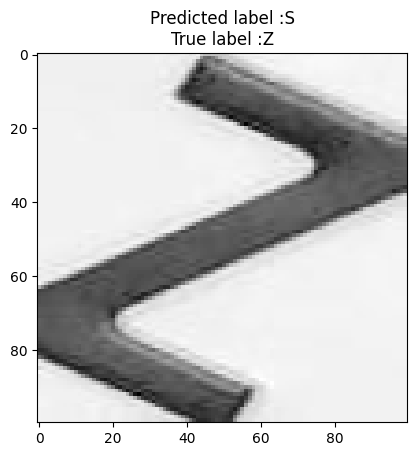

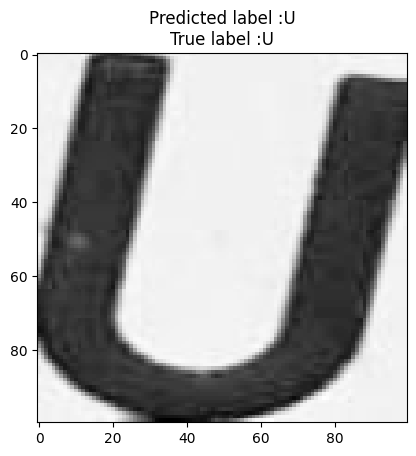

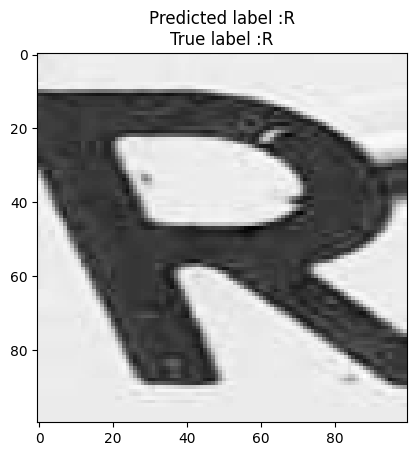

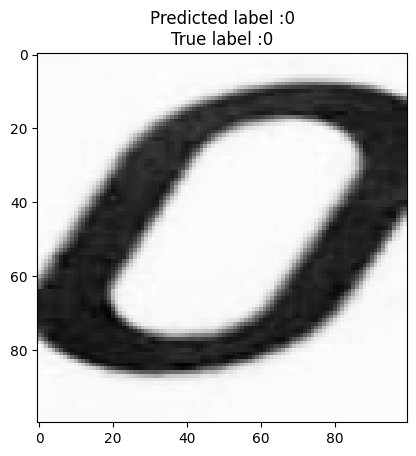

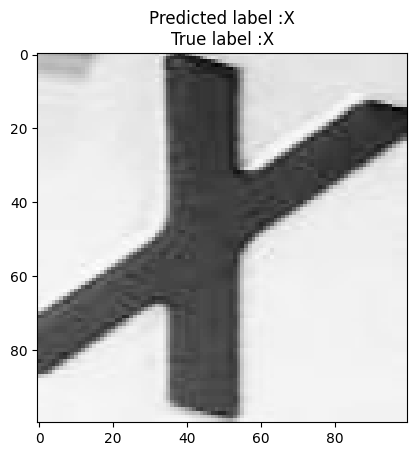

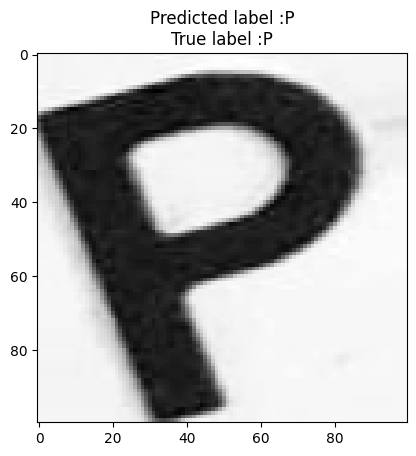

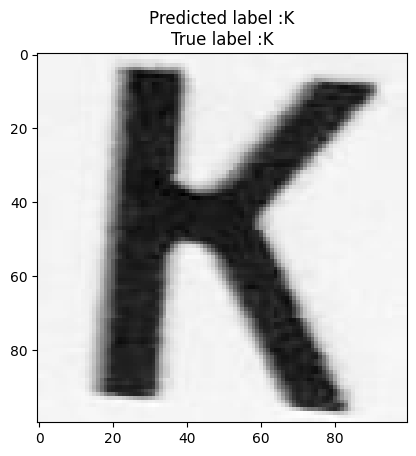

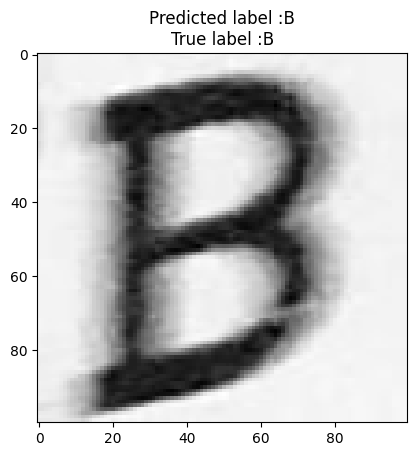

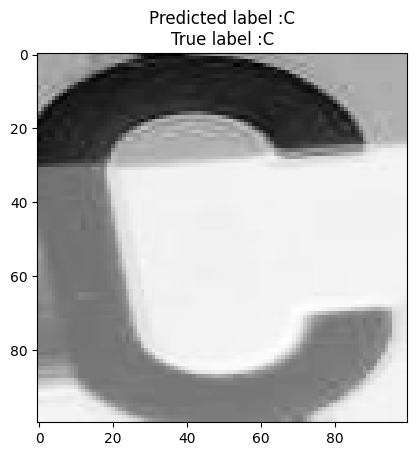

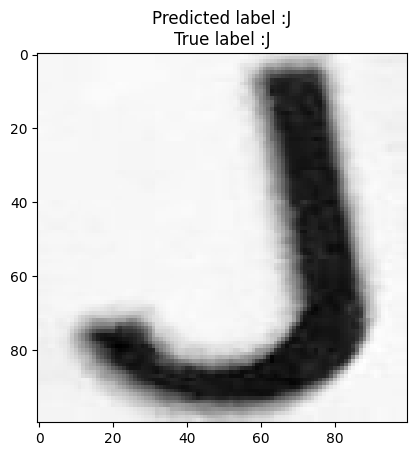

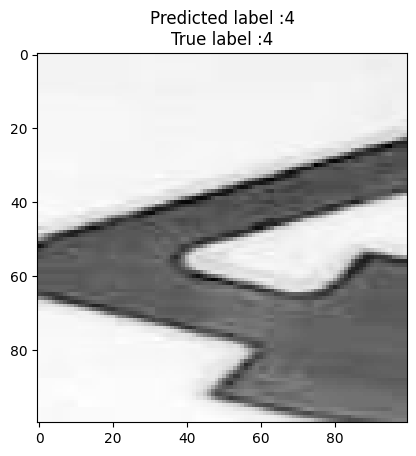

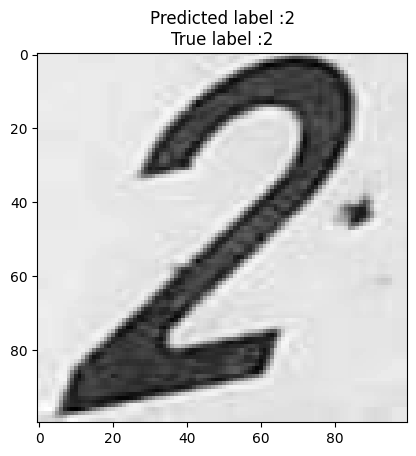

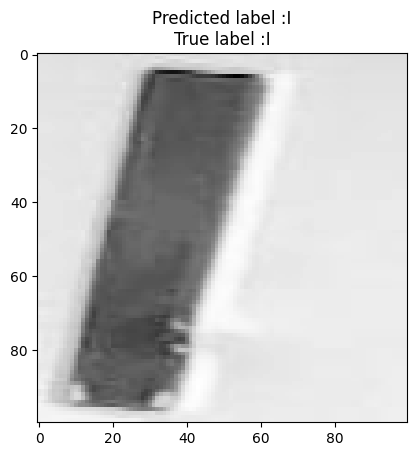

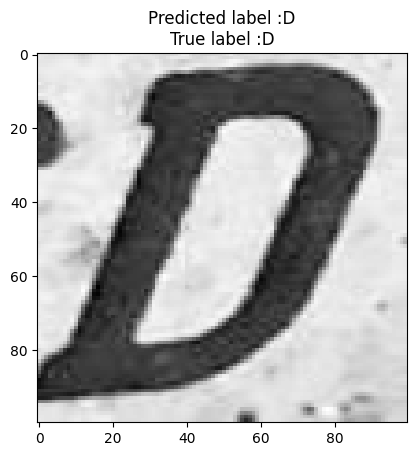

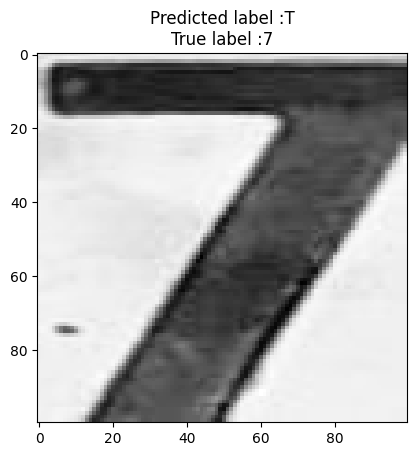

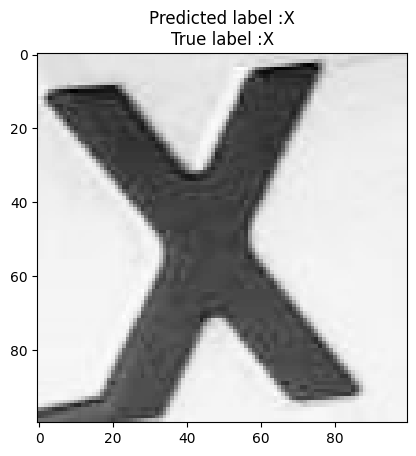

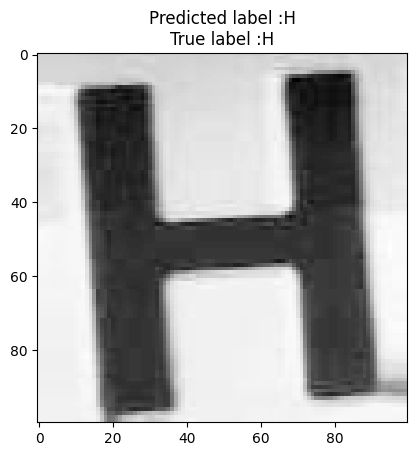

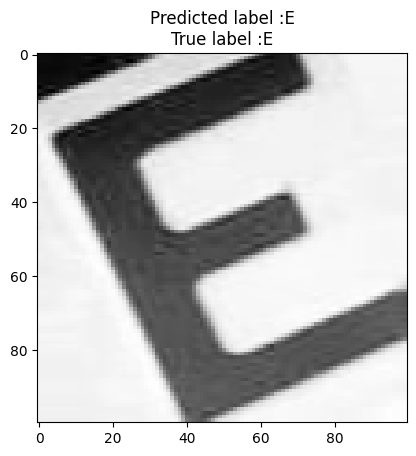

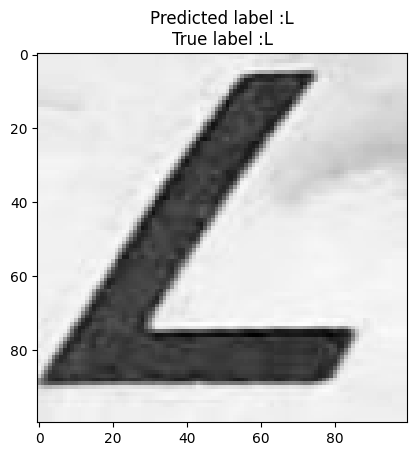

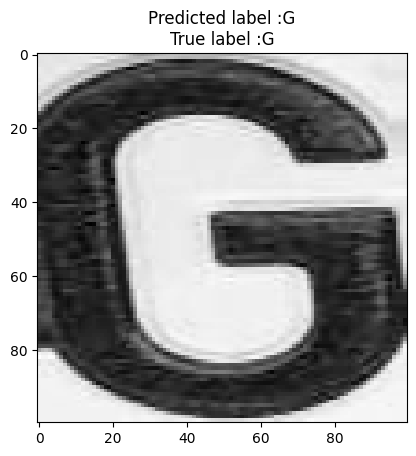

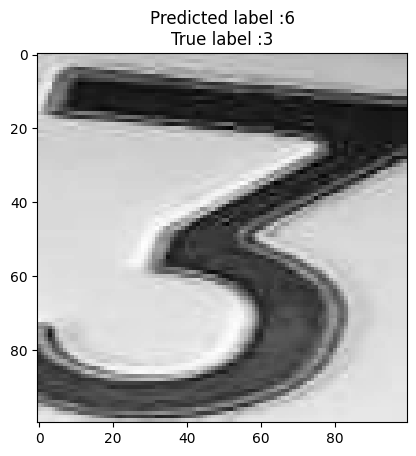

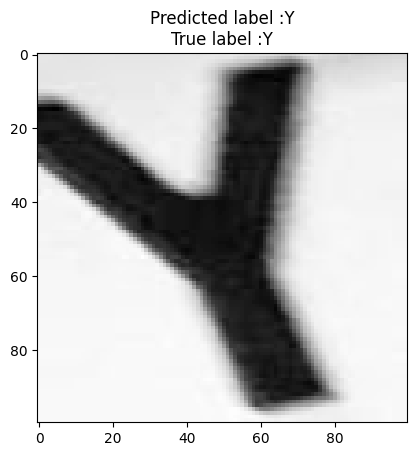

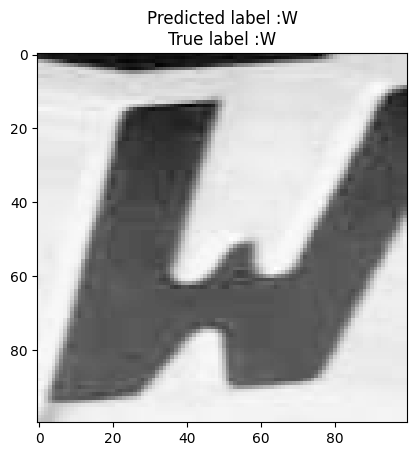

In [ ]:
import numpy as np
listed = list(np.where(dataframed))
listed = listed[0].tolist()
listed = list(set(listed))
y1 = Plate_Letter_Digit_Classifier.predict(X_Test)
for x in range(0, 50) :
        plt.subplots()
        plt.imshow(X_Test[x], cmap = 'Greys_r')
        prediction_answer = np.argmax(y1[x])
        plt.title("Predicted label :{}\nTrue label :{}".format(label_word[prediction_answer], label_word[y_Test.iloc[int(listed[x])]['label']]))